# Problem Statement

In this notebook we will be discussing about the Credit Card Fraud Classification and will be building a Supervised Learning Model to predict the Fraud Transaction that may have happened.Till this date Fraud Detection is one of the major problems of the banks and companies.Solving this problem will help the banks to identify the Fraud Transaction that may have happened and it will help them to take actions against that. This will reduce the risk of the Fraud Transaction. It will also reduce a lot of manual power that till is used to identify the Fraud Detection and will increase the productivity of the Bank. In India in the month of September about 81 Crore of Fraud Detection has been spotted.

About the Data

• Data Source: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

• The dataset contains the payments information

In [1]:
import pandas as pd
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./credit-card-fraud" (use force=True to force download)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/credit-card-fraud/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Extrapolatory Data Analysis

In [4]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [5]:
df.shape

(1000000, 8)

In [6]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
df['distance_from_home'] = df['distance_from_home'].fillna(df['distance_from_home'].mean())
df['distance_from_last_transaction'] = df['distance_from_last_transaction'].fillna(df['distance_from_last_transaction'].mean())
df['ratio_to_median_purchase_price'] = df['ratio_to_median_purchase_price'].fillna(df['ratio_to_median_purchase_price'].mean())

In [9]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

<Axes: >

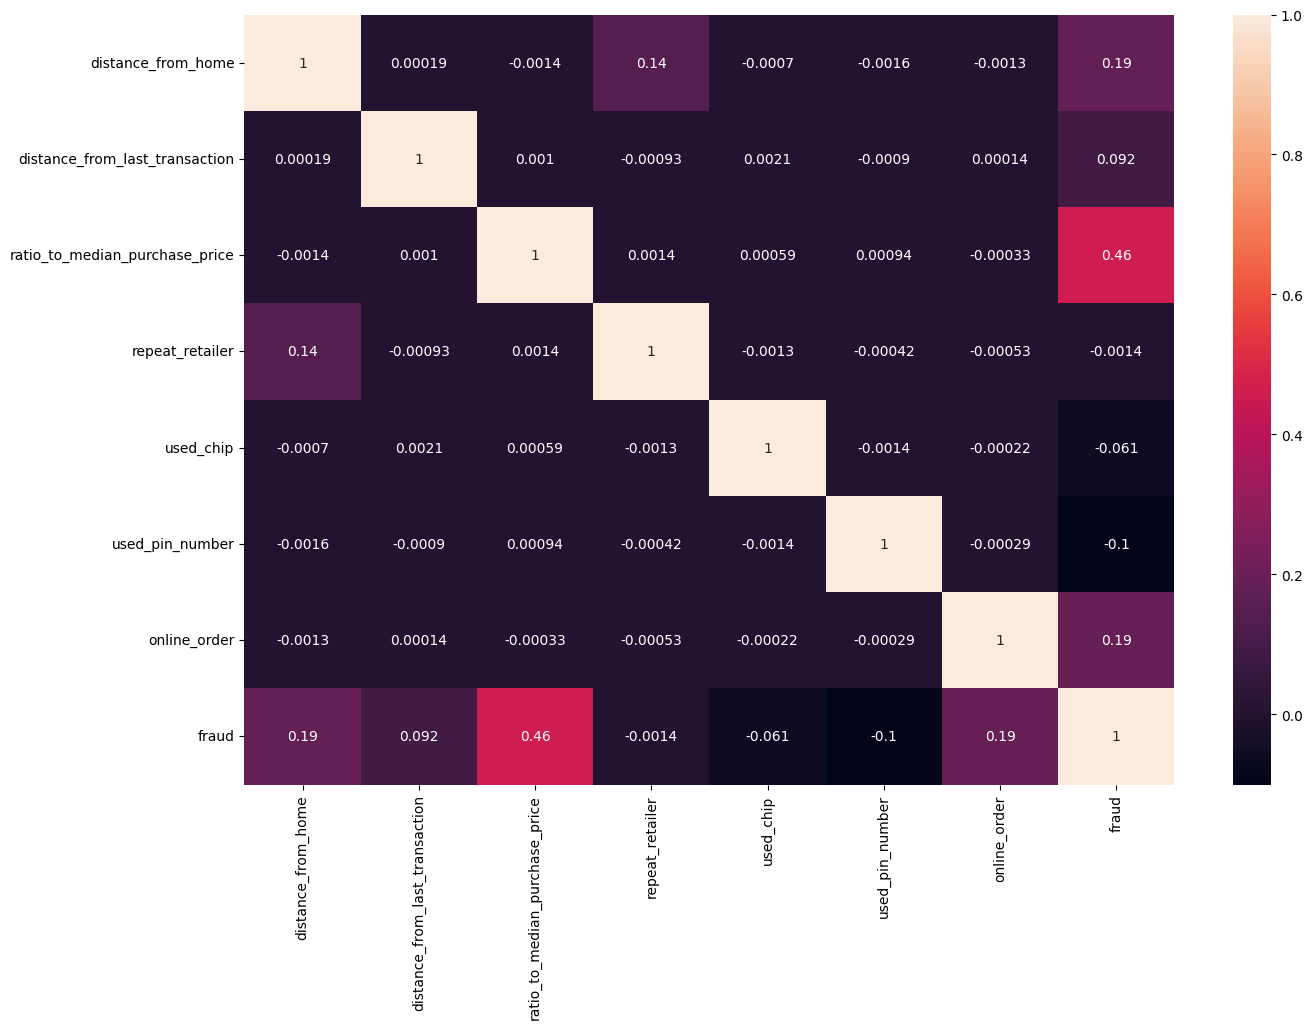

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

By using this Correlation Heatmap we can understand which is highly corelated or very less correlated to the target column.

• The ratio_to_median_purchase_price and the fraud are the most highly correlated that means ratio_to_median_purchase_price feature plays an important role in the prediction of the fraud features.

• Correlation heatmap also helps to check the multicollinearity in the dataset which helps us to drop the features that are highly correlated so that we don't work on one feature twice.

<Axes: ylabel='count'>

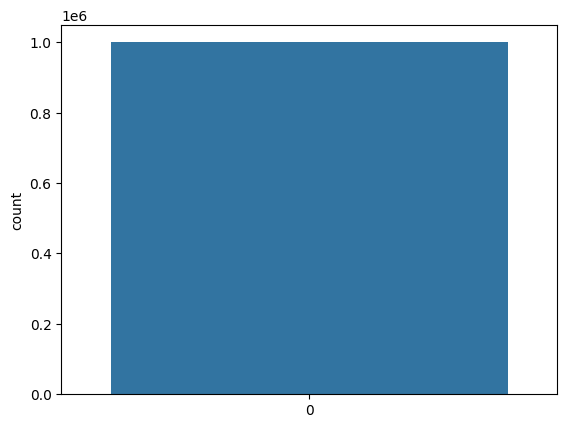

In [11]:
sns.countplot(df["fraud"])  # So from this countplot of the fraud feature tells us that the probability of the transaction of being a fraud detection is very low compared to the positive transactions.

In [12]:
normal_transaction = df[df['fraud']==0]
fraud_transaction = df[df['fraud']==1]

In [13]:
normal_transaction

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [14]:
fraud_transaction

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [15]:
print("shape of normal transaction", normal_transaction.shape)
print("shape of fraud transaction", fraud_transaction.shape)

shape of normal transaction (912597, 8)
shape of fraud transaction (87403, 8)


Here I have subset the dataset among the categories of normal_transaction and fraud_transaction. We can see that normal_transaction is huge in number compared to fraud transaction. The problem with this type of imbalanced dataset is that the model be biased to the normal_transaction and it may classify the fraud_transaction into normal_transaction which can be a issue

# Down Sampling
Here we will be implementing Down Sampling on the dataset. As the dataset is huge so we can do the down sampling. After the down sampling our dataset will be fully balanced meaning the normal and fraud transaction count will be same

In [16]:
X = df.iloc[:,:7]               #splitting the data into independent and dependent features
Y = df["fraud"]

In [17]:
rus = RandomUnderSampler()
x,y = rus.fit_resample(X,Y)

In [18]:
print("shape of normal transaction", x.shape)
print("shape of fraud transaction", y.shape)

shape of normal transaction (174806, 7)
shape of fraud transaction (174806,)


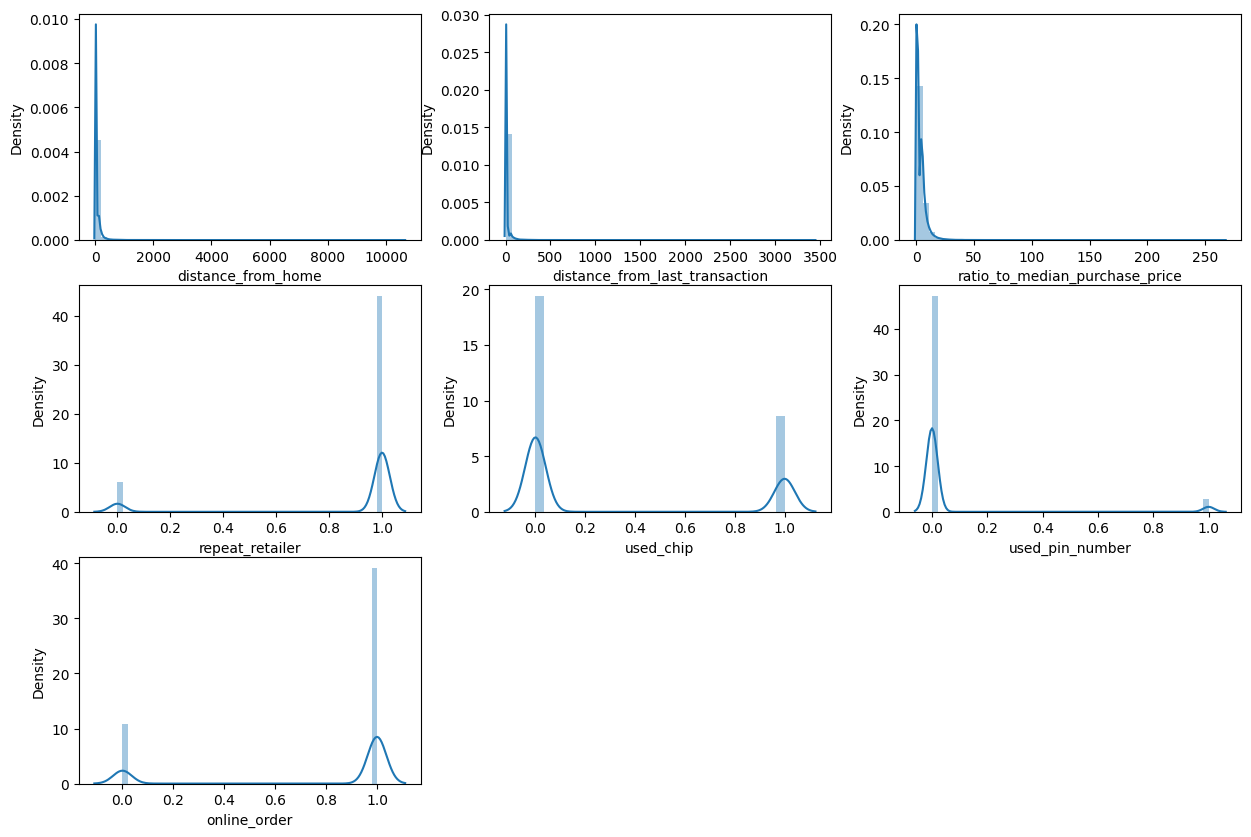

In [19]:
## Data Distributions
plt.figure(figsize=(15,10))
for idx,col in enumerate(x.columns):
    ax = plt.subplot(3,3,idx+1)
    sns.distplot(x[col])

Above subplots shows the distributions of the various features in the dataset

In [20]:
#Scaling the Continuous Features

standard_scaler = StandardScaler()
x_res = standard_scaler.fit_transform(x.iloc[:,:3])

In [21]:
cols = x.columns[:3]
new_df = pd.DataFrame({cols[0]:x_res[:,0],cols[1]:x_res[:,1],cols[2]:x_res[:,2]})

In [22]:
x = x.drop(cols,axis=1)

In [23]:
x = pd.concat([new_df,x],axis=1)

In [24]:
x.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.388840,-0.191547,-0.492846,1.0,1.0,0.0,1.0
1,-0.382805,-0.225691,-0.652346,1.0,0.0,0.0,0.0
2,-0.417166,-0.206786,-0.758955,0.0,0.0,0.0,1.0
3,0.157439,-0.159262,-0.733374,1.0,0.0,1.0,0.0
4,0.052330,-0.150049,-0.690916,1.0,0.0,0.0,0.0


Splitting the Data into Train & Test

In [25]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=90,random_state=3)

In [26]:
print(f"shape of x_train {x_train.shape}")
print(f"shape of y_train {y_train.shape}")
print(f"shape of x_test {x_test.shape}")
print(f"shape of y_test {y_test.shape}")

shape of x_train (90, 7)
shape of y_train (90,)
shape of x_test (174716, 7)
shape of y_test (174716,)


In [27]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="gini",max_depth=4)
model=tree.fit(x_train,y_train)
model.score(x_test,y_test)

0.9114105176400559

In [29]:
forest=RandomForestClassifier(n_estimators=200)
model=forest.fit(x_train,y_train)
model.score(x_test,y_test)

0.957004510176515

In [30]:
y_pred = tree.predict(x_test)
y_pred

array([0., 1., 0., ..., 1., 1., 0.])

In [31]:
# Calculating the Accuracy Score for DecisionTreeClassifier
accuracy = accuracy_score(y_pred,y_test)
print(f"The accuracy of the model is {accuracy*100}")

The accuracy of the model is 91.14105176400558


In [32]:
y_pred1 = forest.predict(x_test)
y_pred1

array([1., 1., 0., ..., 1., 1., 0.])

In [33]:
# Calculating the Accuracy Score for RandomForestClassifier
accuracy = accuracy_score(y_pred1,y_test)
print(f"The accuracy of the model is {accuracy*100}")

The accuracy of the model is 95.7004510176515


Printing the Classification Report

In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     84444
         1.0       0.93      0.90      0.91     90272

    accuracy                           0.91    174716
   macro avg       0.91      0.91      0.91    174716
weighted avg       0.91      0.91      0.91    174716



In [35]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     86570
         1.0       0.96      0.95      0.96     88146

    accuracy                           0.96    174716
   macro avg       0.96      0.96      0.96    174716
weighted avg       0.96      0.96      0.96    174716



<Axes: >

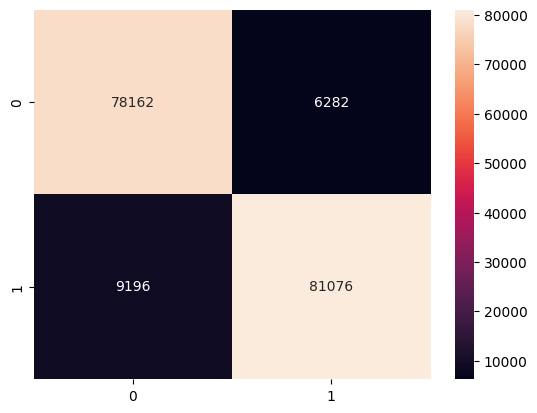

In [36]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_pred,y_test),fmt='g',annot=True)

• The model perfectly fits the training and testing data so our model is low bias and low variance. There is no overfitting or underfitting. The model built is generalised

• we can conclude that the ratio_to_median_purchase_price , distance_from_home and online_order are the most importance features in the dataset.

• Data Driven to this problem would be using the graphs , statistical measures , facts etc to find whether the transaction is fraud or not.